In [1]:
#bibliotecas a serem utilizadas 
#visualização de RMSE no jupyter
library(ggplot2)
library(tidyverse)


Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [17]:
kalman=as.data.frame(read.table("../ESC/1-100/resultados/df_kalmanSmoothing.txt"))
inter=as.data.frame(read.table("../ESC/1-100/resultados/df_linear_interpolation.txt"))
locf=as.data.frame(read.table("../ESC/1-100/resultados/df_locf.txt"))
mean=as.data.frame(read.table("../ESC/1-100/resultados/df_mean.txt"))
median=as.data.frame(read.table("../ESC/1-100/resultados/df_median.txt"))
malExp=as.data.frame(read.table("../ESC/1-100/resultados/df_movingAverage_exponential.txt"))
malLin=as.data.frame(read.table("../ESC/1-100/resultados/df_movingAverage_linear.txt"))
malSim=as.data.frame(read.table("../ESC/1-100/resultados/df_movingAverage_simple.txt"))
spl=as.data.frame(read.table("../ESC/1-100/resultados/df_spline_interpolation.txt"))
sti=as.data.frame(read.table("../ESC/1-100/resultados/df_stine_interpolation.txt"))


In [18]:

names(kalman)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(inter)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(locf)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(mean)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(median)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malExp)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malLin)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malSim)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(spl)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(sti)=c("algoritmo" , "rmse", "mse", "mae", "mape")

func <- function(i){
    ob=c(i,i+100,i+200)
    
    return(ob)
}

#Tirando a média 
tamanhoGap= seq(1,100,1) 

mediaKal=c()
mediaInter=c()
mediaLocf=c()
mediaMean=c()
mediaMedian=c()
mediaMalExp=c()
mediaMalLin=c()
mediaMalSim=c()
mediaSpl=c()
mediaSti=c()

sdKal=c()
sdInter=c()
sdLocf=c()
sdMean=c()
sdMedian=c()
sdMalExp=c()
sdMalLin=c()
sdMalSim=c()
sdSpl=c()
sdSti=c()

varKal=c()
varInter=c()
varLocf=c()
varMean=c()
varMedian=c()
varMalExp=c()
varMalLin=c()
varMalSim=c()
varSpl=c()
varSti=c()


sdLacKal=c()
sdLacInter=c()
sdLacLocf=c()
sdLacMean=c()
sdLacMedian=c()
sdLacMalExp=c()
sdLacMalLin=c()
sdLacMalSim=c()
sdLacSpl=c()
sdLacSti=c()


varLacKal=c()
varLacInter=c()
varLacLocf=c()
varLacMean=c()
varLacMedian=c()
varLacMalExp=c()
varLacMalLin=c()
varLacMalSim=c()
varLacSpl=c()
varLacSti=c()


mediaLacKal=c()
mediaLacInter=c()
mediaLacLocf=c()
mediaLacMean=c()
mediaLacMedian=c()
mediaLacMalExp=c()
mediaLacMalLin=c()
mediaLacMalSim=c()
mediaLacSpl=c()
mediaLacSti=c()

a=c()
# Calculando a média das três lacunas do dia 
for(z in seq(1,100,1)){
    for (i in seq(z,9000,300)){
        a=(func(i))
        mediaLacInter=append(mediaLacInter, mean(inter$rmse[a]))
        mediaLacKal=append(mediaLacKal, mean(kalman$rmse[a])) 
        mediaLacLocf=append(mediaLacLocf,mean(locf$rmse[a]))
        mediaLacMean=append(mediaLacMean,mean(mean$rmse[a]))
        mediaLacMedian=append(mediaLacMedian,mean(median$rmse[a]))
        mediaLacMalExp=append(mediaLacMalExp,mean(malExp$rmse[a]))
        mediaLacMalLin=append(mediaLacMalLin,mean(malLin$rmse[a]))
        mediaLacMalSim=append(mediaLacMalSim,mean(malSim$rmse[a]))
        mediaLacSpl=append(mediaLacSpl,mean(spl$rmse[a]))
        mediaLacSti=append(mediaLacSti,mean(sti$rmse[a]))


        sdLacKal=append(sdLacKal, sd(kalman$rmse[a])) 
        sdLacInter=append(sdLacInter, sd(inter$rmse[a]))
        sdLacLocf=append(sdLacLocf,sd(locf$rmse[a]))
        sdLacMean=append(sdLacMean,sd(mean$rmse[a]))
        sdLacMedian=append(sdLacMedian,sd(median$rmse[a]))
        sdLacMalExp=append(sdLacMalExp,sd(malExp$rmse[a]))
        sdLacMalLin=append(sdLacMalLin,sd(malLin$rmse[a]))
        sdLacMalSim=append(sdLacMalSim,sd(malSim$rmse[a]))
        sdLacSpl=append(sdLacSpl,sd(spl$rmse[a]))
        sdLacSti=append(sdLacSti,sd(sti$rmse[a]))


        varLacKal=append(varLacKal, var(kalman$rmse[a])) 
        varLacInter=append(varLacInter, var(inter$rmse[a]))
        varLacLocf=append(varLacLocf,var(locf$rmse[a]))
        varLacMean=append(varLacMean,var(mean$rmse[a]))
        varLacMedian=append(varLacMedian,var(median$rmse[a]))
        varLacMalExp=append(varLacMalExp,var(malExp$rmse[a]))
        varLacMalLin=append(varLacMalLin,var(malLin$rmse[a]))
        varLacMalSim=append(varLacMalSim,var(malSim$rmse[a]))
        varLacSpl=append(varLacSpl,var(spl$rmse[a]))
        varLacSti=append(varLacSti,var(sti$rmse[a]))
    }
}

for (i in seq(1,3000,30)) {
    #calculando a média
    mediaInter=append(mediaInter,(mean(mediaLacInter[i:(i+29)])))
    mediaKal=append(mediaKal, (mean(mediaLacKal[i:(i+29)])))
    mediaLocf=append(mediaLocf, (mean(mediaLacLocf[i:(i+29)])))
    mediaMean=append(mediaMean, (mean(mediaLacMean[i:(i+29)])))
    mediaMedian=append(mediaMedian, (mean(mediaLacMedian[i:(i+29)])))
    mediaMalExp=append(mediaMalExp, (mean(mediaLacMalExp[i:(i+29)])))
    mediaMalLin=append(mediaMalLin, (mean(mediaLacMalLin[i:(i+29)])))
    mediaMalSim=append(mediaMalSim, (mean(mediaLacMalSim[i:(i+29)])))
    mediaSpl=append(mediaSpl, (mean(mediaLacSpl[i:(i+29)])))
    mediaSti=append(mediaSti, (mean(mediaLacSti[i:(i+29)])))
    
    #calculando o devio padrão
    sdInter=append(sdInter,(sd(sdLacInter[i:(i+29)])))
    sdKal=append(sdKal, (sd(sdLacKal[i:(i+29)])))
    sdLocf=append(sdLocf, (sd(sdLacLocf[i:(i+29)])))
    sdMean=append(sdMean, (sd(sdLacMean[i:(i+29)])))
    sdMedian=append(sdMedian, (sd(sdLacMedian[i:(i+29)])))
    sdMalExp=append(sdMalExp, (sd(sdLacMalExp[i:(i+29)])))
    sdMalLin=append(sdMalLin, (sd(sdLacMalLin[i:(i+29)])))
    sdMalSim=append(sdMalSim, (sd(sdLacMalSim[i:(i+29)])))
    sdSpl=append(sdSpl, (sd(sdLacSpl[i:(i+29)])))
    sdSti=append(sdSti, (sd(sdLacSti[i:(i+29)])))

    #calculando a variancia
    varInter=append(varInter,(var(varLacInter[i:(i+29)])))
    varKal=append(varKal, (var(varLacKal[i:(i+29)])))
    varLocf=append(varLocf, (var(varLacLocf[i:(i+29)])))
    varMean=append(varMean, (var(varLacMean[i:(i+29)])))
    varMedian=append(varMedian, (var(varLacMedian[i:(i+29)])))
    varMalExp=append(varMalExp, (var(varLacMalExp[i:(i+29)])))
    varMalLin=append(varMalLin, (var(varLacMalLin[i:(i+29)])))
    varMalSim=append(varMalSim, (var(varLacMalSim[i:(i+29)])))
    varSpl=append(varSpl, (var(varLacSpl[i:(i+29)])))
    varSti=append(varSti, (var(varLacSti[i:(i+29)])))

}
mediaInter=as.data.frame(mediaInter)
names(mediaInter)=c("media")
mediaInter$sd=sdInter
mediaInter$var=varInter
mediaInter$tamanho=tamanhoGap
mediaInter$algoritmo="Interpolation"

mediaKal=as.data.frame(mediaKal)
names(mediaKal)=c("media")
mediaKal$sd=sdKal
mediaKal$var=varKal
mediaKal$tamanho=tamanhoGap
mediaKal$algoritmo="Kalman"


mediaLocf=as.data.frame(mediaLocf)
names(mediaLocf)=c("media")
mediaLocf$sd=sdLocf
mediaLocf$var=varLocf
mediaLocf$tamanho=tamanhoGap
mediaLocf$algoritmo="Locf"


mediaMean=as.data.frame(mediaMean)
names(mediaMean)=c("media")
mediaMean$sd=sdMean
mediaMean$var=varMean
mediaMean$tamanho=tamanhoGap
mediaMean$algoritmo="Mean"

mediaMedian=as.data.frame(mediaMedian)
names(mediaMedian)=c("media")
mediaMedian$sd=sdMedian
mediaMedian$var=varMedian
mediaMedian$tamanho=tamanhoGap
mediaMedian$algoritmo="Median"


mediaMalExp=as.data.frame(mediaMalExp)
names(mediaMalExp)=c("media")
mediaMalExp$sd=sdMalExp
mediaMalExp$var=varMalExp
mediaMalExp$tamanho=tamanhoGap
mediaMalExp$algoritmo="Moving Average Exponential"

mediaMalLin=as.data.frame(mediaMalLin)
names(mediaMalLin)=c("media")
mediaMalLin$sd=sdMalLin
mediaMalLin$var=varMalLin
mediaMalLin$tamanho=tamanhoGap
mediaMalLin$algoritmo="Moving Average Linear"

mediaMalSim=as.data.frame(mediaMalSim)
names(mediaMalSim)=c("media")
mediaMalSim$sd=sdMalSim
mediaMalSim$var=varMalSim
mediaMalSim$tamanho=tamanhoGap
mediaMalSim$algoritmo="Moving Average Simple"




mediaSti=as.data.frame(mediaSti)
names(mediaSti)=c("media")
mediaSti$sd=sdSti
mediaSti$var=varSti
mediaSti$tamanho=tamanhoGap
mediaSti$algoritmo="Stine"

mediaSpl=as.data.frame(mediaSpl)
names(mediaSpl)=c("media")
mediaSpl$sd=sdSpl
mediaSpl$var=varSpl
mediaSpl$tamanho=tamanhoGap
mediaSpl$algoritmo="Spline"

todos = rbind(mediaKal, mediaInter, mediaLocf, mediaMedian, mediaMean, mediaMalExp, mediaMalLin, mediaMalSim, mediaSpl, mediaSti)

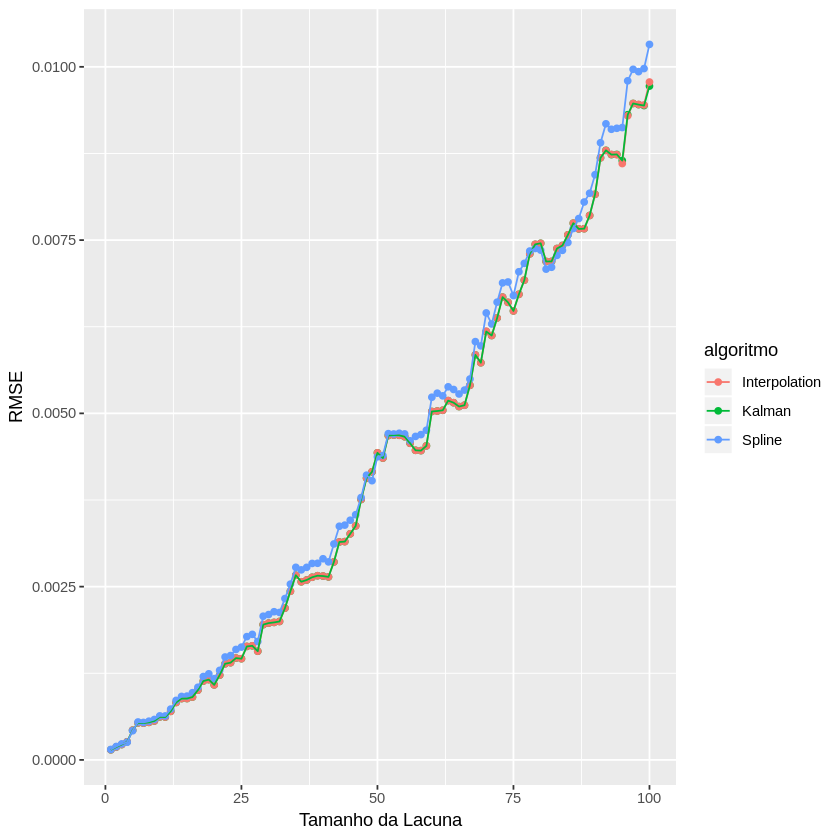

In [16]:
ggplot(todos[which(todos$algoritmo=="Kalman" | todos$algoritmo=="Spline" | todos$algoritmo=="Interpolation"),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")


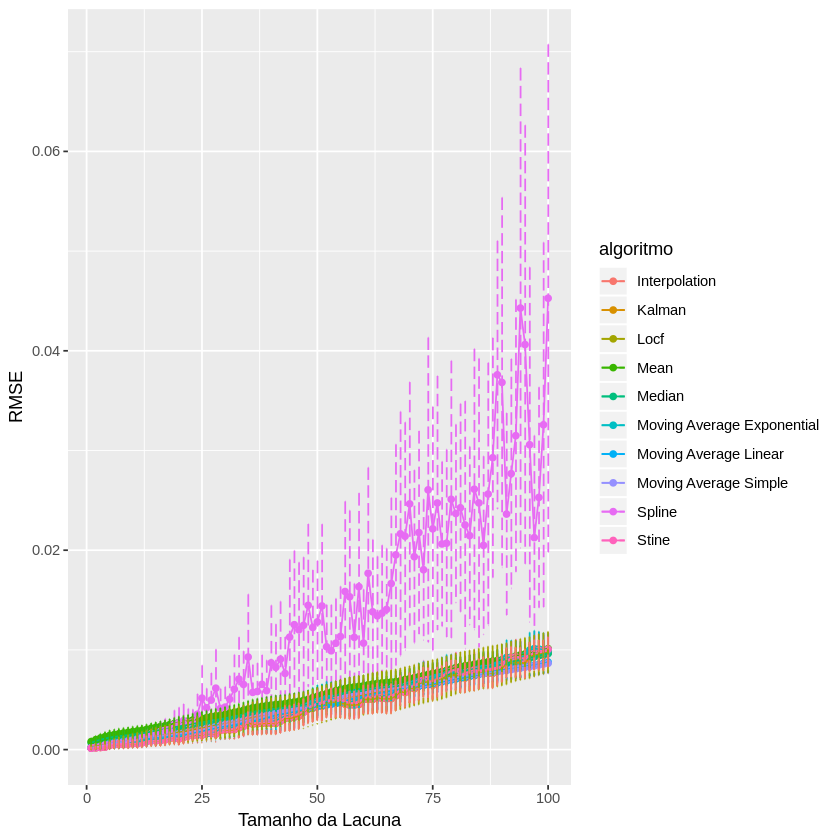

In [5]:
n=90 #tamanho da amostra. Ou seja, tem 90 lacunas de tamanho 1, 2 de tamanho 20... 90 de tamanho 100
error=qnorm(0.975)*todos$sd/sqrt(n)
todos$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")


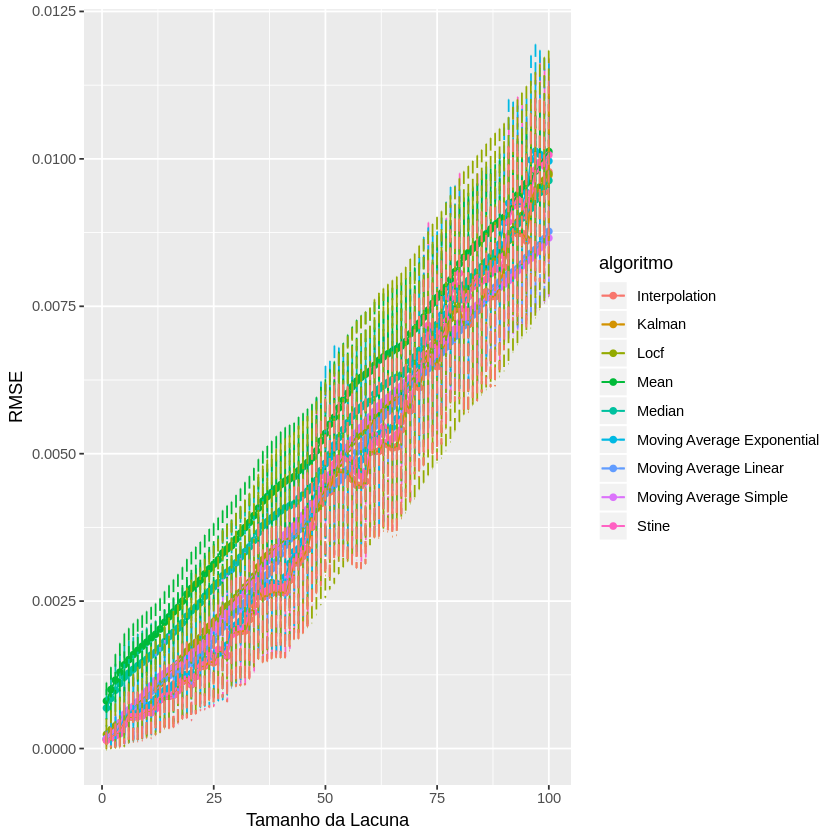

In [6]:
ggplot(todos[which(todos$algoritmo!= "Spline" & todos$tamanho<3000),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna") 
    


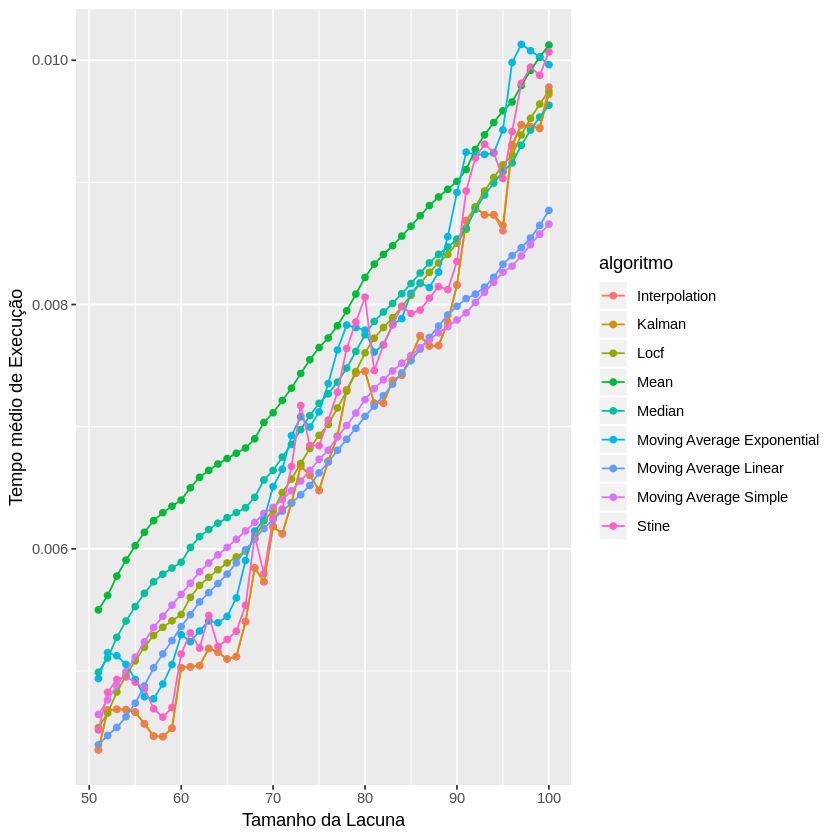

In [7]:

ggplot(todos[which(todos$algoritmo!= "Spline" & todos$tamanho>50),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
   # geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna") 
    


In [8]:
(filter(todos, tamanho==100))

media,sd,var,tamanho,algoritmo,error
0.009721769,0.007306344,3.256177e-08,100,Kalman,0.0015094787
0.009780682,0.007431400,3.481412e-08,100,Interpolation,0.0015353150
0.009748939,0.010095366,2.280628e-07,100,Locf,0.0020856860
0.009632100,0.004784006,8.306640e-09,100,Median,0.0009883678
0.010124365,0.004551960,6.502978e-09,100,Mean,0.0009404275
0.009963546,0.008014876,5.652575e-08,100,Moving Average Exponential,0.0016558601
0.008771012,0.004880879,8.788881e-09,100,Moving Average Linear,0.0010083816
0.008658350,0.004959443,8.693284e-09,100,Moving Average Simple,0.0010246126
0.045270311,0.123244543,2.560119e-03,100,Spline,0.0254621185
0.010067675,0.007916381,4.645837e-08,100,Stine,0.0016355112


In [9]:
teste=(select(todos[order(todos$tamanho, todos$media, decreasing=c(FALSE,FALSE)),], -sd))

by_mean <- group_by(teste, tamanho)
#summarise(by_mean, rmseMin = min(media))

In [10]:
#Agrupando o dataframe pelo tamanho e algoritmo
by_alg=group_by(teste, tamanho, algoritmo)
#select(by_alg, -var,-error)
#sumarizando o agrupamento pela menor média
by_length=summarise(by_alg, media=min(media))
tam=by_length %>% arrange(tamanho,media)
write.table(tam,"tamanhoEmedia.txt")
#filtrando o resultado pela menor média. 
a=by_length%>% filter(media==min(media))
a
write.table(a, "min.txt")

tamanho,algoritmo,media
1,Stine,0.0001406710
2,Stine,0.0001783128
3,Stine,0.0002144574
4,Stine,0.0002502363
5,Stine,0.0004091377
6,Interpolation,0.0005340792
7,Kalman,0.0005304073
8,Interpolation,0.0005417454
9,Stine,0.0005575746
10,Stine,0.0006127357


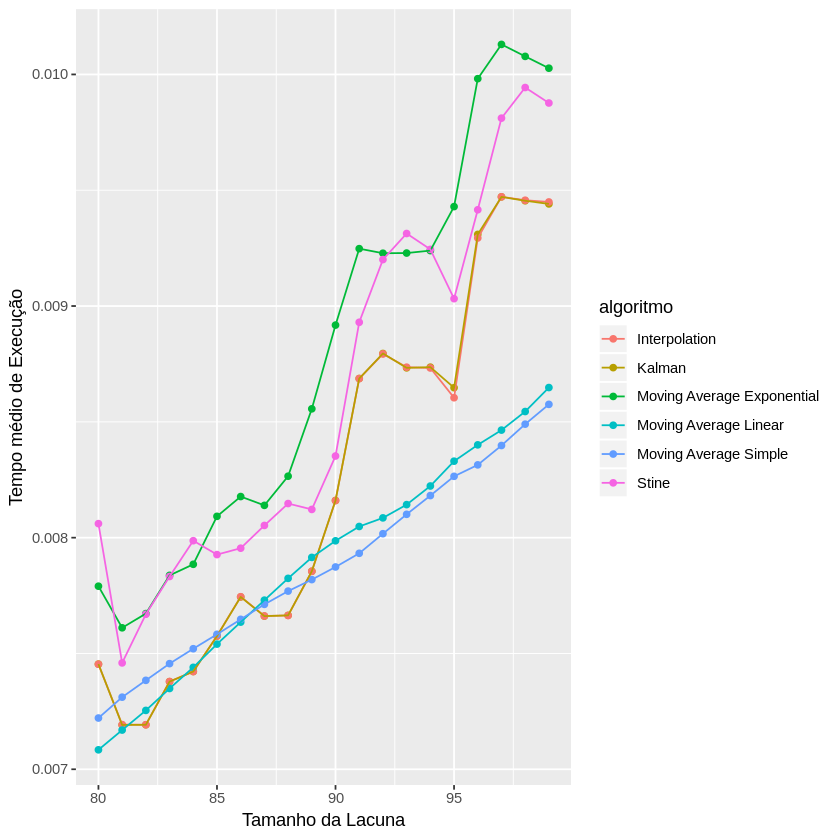

In [11]:
ggplot(todos[which(todos$algoritmo!= "Locf" & todos$algoritmo!= "Spline" & todos$algoritmo!= "Mean"  & todos$algoritmo!= "Median" &  todos$tamanho>=80 &  todos$tamanho<100),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    #geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna") 
    